In [1]:
using Plots

In [2]:
s = 10.;
b = 8/3.;
r = 28.;
mutable struct Lorenz
     x; y; z;
end
rLorenz()=Lorenz(50.0*rand()-25.,50.0*rand()-25.,50.0*rand())
function step!(a::Lorenz,dt)
    a.x+=dt*s*(a.y-a.x);
    a.y+=dt*(a.x*(r-a.z)-a.y);
    a.z+=dt*(a.x*a.y-b*a.z);
    end;
Base.copy(a::Lorenz)=Lorenz(a.x,a.y,a.z)

In [3]:
#=
time step of array of attractors where x-coordinates 
are first replaced by a weighted average of other x coordinates + noise
=#
function step!(attractors::Array{Lorenz,1},weights::Array{Float64,2},dt,rnd)
    #calculate new x-coordinates
    local xs=zeros(length(attractors));
    for i in 1:length(attractors)
        for j in 1:length(attractors)
            xs[i]+=weights[i,j]*attractors[j].x;
        end
        xs[i]/=sum(weights[i,:]);
        xs[i]+=2*rnd*(rand()-.5)
    end
    #update coordinates and perform time step
    for i in 1:length(attractors)
        attractors[i].x=xs[i];
        step!(attractors[i],dt);
    end
end

step! (generic function with 2 methods)

In [79]:
# 3d plot of array of Lorenz attractors
function plotL(rec::Array{Array{Lorenz,1},1})
    x=[rec[i][1].x for i=1:length(rec)];
    y=[rec[i][1].y for i=1:length(rec)];
    z=[rec[i][1].z for i=1:length(rec)];
    for j=2:length(rec[1])
        x=hcat(x,[rec[i][j].x for i=1:length(rec)]);
        y=hcat(y,[rec[i][j].y for i=1:length(rec)]);
        z=hcat(z,[rec[i][j].z for i=1:length(rec)]);
    end
    plot3d(x,y,z, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),leg=false)
end
# YZ plane plot of array of Lorenz attractors
function plotLyz(rec::Array{Array{Lorenz,1},1})
    y=[rec[i][1].y for i=1:length(rec)];
    z=[rec[i][1].z for i=1:length(rec)];
    for j=2:length(rec[1])
        y=hcat(y,[rec[i][j].y for i=1:length(rec)]);
        z=hcat(z,[rec[i][j].z for i=1:length(rec)]);
    end
    plot(y,z, xlim=(-25,25), ylim=(0,50),leg=false)
end
function distYZ(a::Lorenz,b::Lorenz)
    sqrt((a.y-b.y)^2+(a.z-b.z)^2)
end
function dist(a::Lorenz,b::Lorenz)
    sqrt((a.x-b.x)^2+(a.y-b.y)^2+(a.z-b.z)^2)
end

dist (generic function with 1 method)

In [81]:
w1=[1. 0.;1. 0.];# synchro to first
w2=[1. 0.;0. 1.];# no synchro
dt=.01;
noise=.1^10;
as=Array{Lorenz,1}();
for i=1:2
    push!(as,rLorenz());
end
record=Array{Array{Lorenz,1},1}();
for j=1:3000
    step!(as,w1,dt,noise);
    push!(record,deepcopy(as));
end
for j=1:4000
    step!(as,w2,dt,noise);
    push!(record,deepcopy(as));
end
for j=1:3000
    step!(as,w1,dt,noise);
    push!(record,deepcopy(as));
end

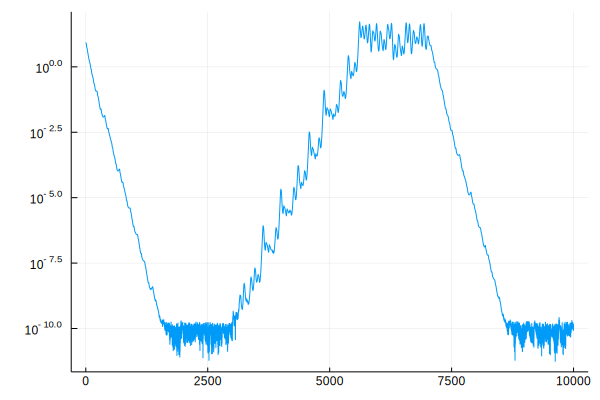

In [82]:
plot([dist(record[i][1],record[i][2]) for i=1:length(record)],yaxis=:log,leg=false)

In [14]:
m=10;
w1=zeros(m,m);
w2=zeros(m,m);
as=Array{Lorenz,1}();
for i=1:m
    w1[i,i]=1.;
    w2[i,i]=1.;
    for j=i:m
        if rand()<.3
            w1[i,j]=1.;
            w1[j,i]=1.;
        end
    end
end

dt=.1^2;
noise=.1^2;
as=Array{Lorenz,1}();
for i=1:m
    push!(as,rLorenz());
end
record=Array{Array{Lorenz,1},1}();
for j=1:500
    step!(as,w1,dt,noise);
    push!(record,deepcopy(as));
end
for j=1:1500
    step!(as,w2,dt,noise);
    push!(record,deepcopy(as));
end
for j=1:500
    step!(as,w1,dt,noise);
    push!(record,deepcopy(as));
end

┌ Info: Saved animation to 
│   fn = C:\Users\Jachym\Jupyter\tmp.gif
└ @ Plots C:\Users\Jachym\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\Jachym\\Jupyter\\tmp.gif")
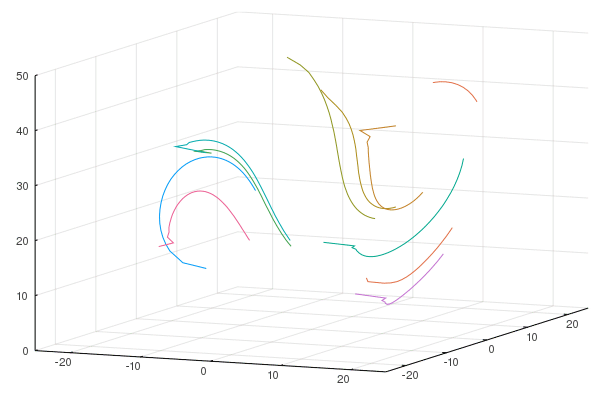

In [50]:
@gif for i=1:2:length(record)-40
    global pl=plotL(record[i:i+40])
end

In [15]:
dt=.1^2;
noise=.1^2;
as=Array{Lorenz,1}();
for i=1:m
    push!(as,rLorenz());
end
record=Array{Array{Lorenz,1},1}();
for j=1:3000
    step!(as,w2,dt,noise);
    push!(record,deepcopy(as));
end

┌ Info: Saved animation to 
│   fn = /home/sykora/Jupyter/Lorenz/tmp.gif
└ @ Plots /home/sykora/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/sykora/Jupyter/Lorenz/tmp.gif")
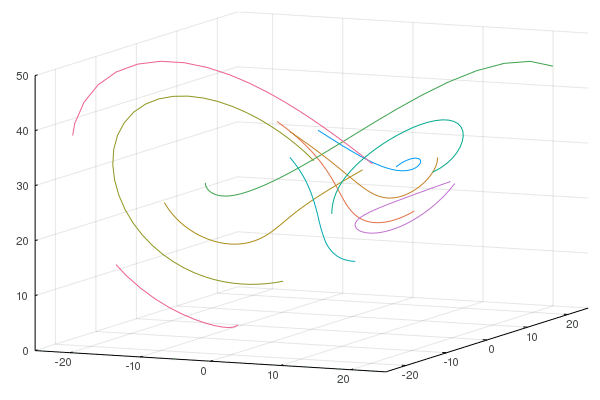

In [16]:
@gif for i=1:2:length(record)-40
    global pl=plotL(record[i:i+40])
end

In [43]:
w1=[1. 0.;1. 0.];# synchro to first
w2=[1. 0.;0. 1.];# no synchro
dt=.001;
noise=.1^10;
as=Array{Lorenz,1}();
n=99;
for i=1:2
    push!(as,rLorenz());
end
record=Array{Array{Lorenz,1},1}();
for j=1:300
    step!(as,w1,dt,noise);
    push!(record,deepcopy(as));
    for k=1:n
        step!(as,w2,dt,noise);
        push!(record,deepcopy(as));
    end
end

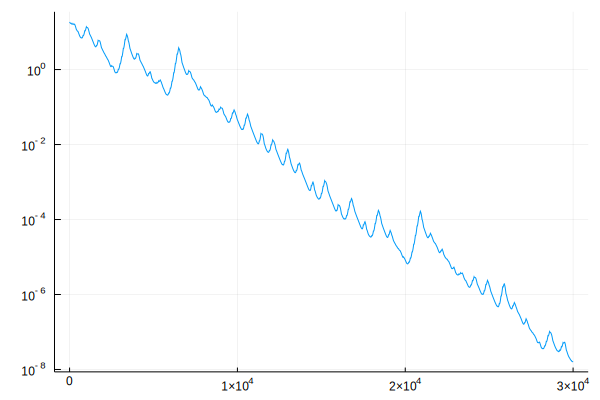

In [44]:
plot([distYZ(record[i][1],record[i][2]) for i=1:length(record)],yaxis=:log,leg=false)

In [76]:
w1=[1. 0 0 0;0 1 0 0;1 0 1 1;0 1 1 1]
w2=[1. 1 1 1;1 1 1 1;1 1 1 1;1 1 1 1]

dt=.1^2;
noise=.1^2;
as=Array{Lorenz,1}();
for i=1:4
    push!(as,rLorenz());
end
record=Array{Array{Lorenz,1},1}();
for j=1:1000
    step!(as,w2,dt,noise);
    push!(record,deepcopy(as));
end
for j=1:1000
    step!(as,w1,dt,noise);
    push!(record,deepcopy(as));
end

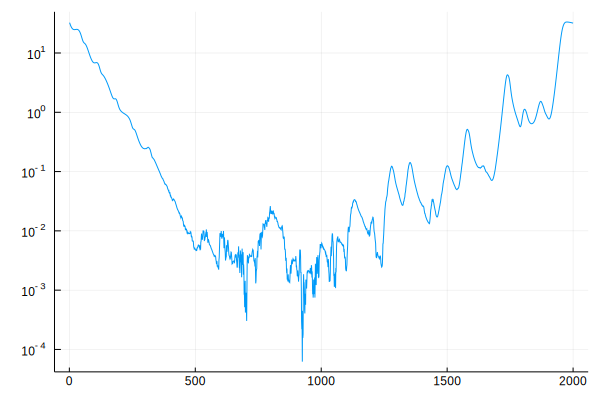

In [77]:
plot([distYZ(record[i][4],record[i][3]) for i=1:length(record)],yaxis=:log,leg=false)

┌ Info: Saved animation to 
│   fn = /home/sykora/Jupyter/Lorenz/tmp.gif
└ @ Plots /home/sykora/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/sykora/Jupyter/Lorenz/tmp.gif")
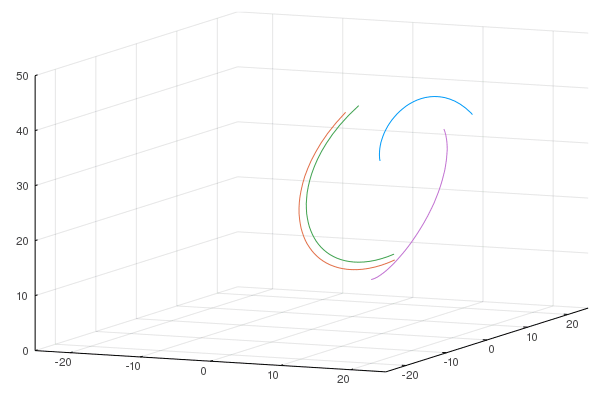

In [78]:
@gif for i=1:2:length(record)-40
    global pl=plotL(record[i:i+40])
end